In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

np.random.seed(10)

In [2]:
# import tensorflow as tf
def solve_cudnn_error():
    gpus = tf.config.experimental.list_physical_devices('GPU')
    if gpus:
        try:
            # Currently, memory growth needs to be the same across GPUs
            for gpu in gpus:
                tf.config.experimental.set_memory_growth(gpu, True)
            logical_gpus = tf.config.experimental.list_logical_devices('GPU')
            print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
        except RuntimeError as e:
            # Memory growth must be set before GPUs have been initialized
            print(e)
            
solve_cudnn_error()            

1 Physical GPUs, 1 Logical GPUs


In [3]:
(x_Train, y_Train), (x_Test, y_Test) = mnist.load_data()

In [4]:
x_Train4D = x_Train.reshape(x_Train.shape[0], 28, 28, 1).astype('float32')
x_Test4D = x_Test.reshape(x_Test.shape[0], 28, 28, 1).astype('float32')

x_Train4D_normalize = x_Train4D / 255
x_Test4D_normalize = x_Test4D / 255

y_Train_OneHot = np_utils.to_categorical(y_Train)
y_Test_OneHot = np_utils.to_categorical(y_Test)

In [5]:
model = Sequential()

model.add(Conv2D(filters     = 16,
                 kernel_size = (5, 5),
                 padding     = 'same',
                 input_shape = (28, 28, 1),
                 activation  = 'relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters     = 36,
                 kernel_size = (5, 5),
                 padding     = 'same',
                 activation  = 'relu'))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 36)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1764)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               2

In [6]:
model.compile(loss      = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics   = ['acc']) # acc = accuracy

In [7]:
train_history = model.fit(x = x_Train4D_normalize,
                          y = y_Train_OneHot,
                          validation_split = 0.2,
                          epochs = 10,
                          batch_size = 300,
                          verbose = 2)

Epoch 1/10
160/160 - 2s - loss: 0.4805 - acc: 0.8493 - val_loss: 0.0991 - val_acc: 0.9704
Epoch 2/10
160/160 - 2s - loss: 0.1348 - acc: 0.9594 - val_loss: 0.0675 - val_acc: 0.9799
Epoch 3/10
160/160 - 2s - loss: 0.0897 - acc: 0.9734 - val_loss: 0.0505 - val_acc: 0.9850
Epoch 4/10
160/160 - 2s - loss: 0.0767 - acc: 0.9772 - val_loss: 0.0452 - val_acc: 0.9870
Epoch 5/10
160/160 - 2s - loss: 0.0625 - acc: 0.9805 - val_loss: 0.0419 - val_acc: 0.9884
Epoch 6/10
160/160 - 2s - loss: 0.0580 - acc: 0.9825 - val_loss: 0.0383 - val_acc: 0.9889
Epoch 7/10
160/160 - 2s - loss: 0.0511 - acc: 0.9843 - val_loss: 0.0376 - val_acc: 0.9894
Epoch 8/10
160/160 - 2s - loss: 0.0472 - acc: 0.9858 - val_loss: 0.0342 - val_acc: 0.9900
Epoch 9/10
160/160 - 2s - loss: 0.0420 - acc: 0.9873 - val_loss: 0.0340 - val_acc: 0.9905
Epoch 10/10
160/160 - 2s - loss: 0.0386 - acc: 0.9878 - val_loss: 0.0364 - val_acc: 0.9893


In [8]:
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel('train')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

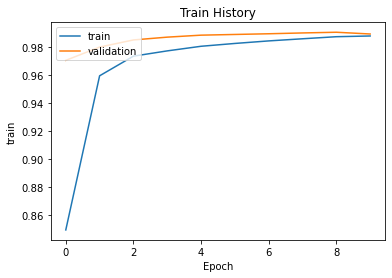

In [9]:
show_train_history(train_history, 'acc', 'val_acc')

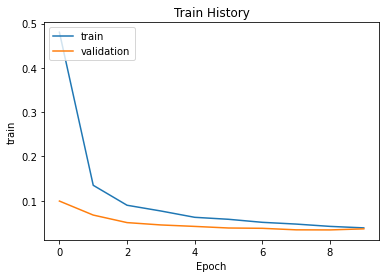

In [10]:
show_train_history(train_history, 'loss', 'val_loss')

In [11]:
scores = model.evaluate(x_Test4D_normalize, y_Test_OneHot)
print('score: ', scores[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0272 - acc: 0.9906
score:  0.9905999898910522


In [16]:
prediction = np.argmax(model.predict(x_Test4D_normalize), axis=-1)
print('Prediction: ', prediction[:10])

Prediction:  [7 2 1 0 4 1 4 9 5 9]


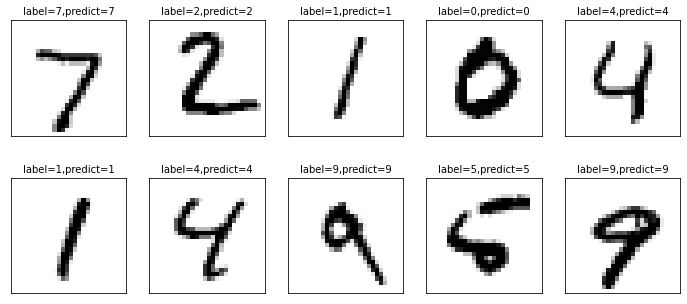

In [13]:
def plot_images_labels_prediction(images, labels, prediction, idx, num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25
    for i in range(0, num):
        ax=plt.subplot(5, 5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title= "label=" + str(labels[idx])
        if len(prediction) > 0:
            title += ",predict=" + str(prediction[idx])
            
        ax.set_title(title, fontsize=10)
        ax.set_xticks([]); ax.set_yticks([])
        idx+=1
    plt.show()
    return
    
plot_images_labels_prediction(x_Test, y_Test, prediction, idx=0)    

In [14]:
crosstab = pd.crosstab(y_Test, prediction, rownames = ['label'], colnames = ['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,978,0,0,0,0,0,0,1,1,0
1,0,1134,1,0,0,0,0,0,0,0
2,3,1,1025,0,0,0,0,1,2,0
3,0,0,3,1004,0,1,0,0,2,0
4,0,0,0,0,979,0,0,2,0,1
5,2,0,0,7,0,879,1,1,0,2
6,5,2,0,0,3,1,946,0,1,0
7,1,3,5,1,0,0,0,1015,1,2
8,3,2,1,1,0,1,0,3,960,3
